In [36]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML

## You might think about how to estimate the out of sample error. Either partition the dataset into 80% training and 20% validation or use cross validation (set the seed to 12345).

In [84]:
# Load the training data
url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
data = pd.read_csv(url)

# Split the data into features and target variable
data= pd.get_dummies(data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','target_No Donor'], axis=1)
data.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,...,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes,target_Donor
0,1,1,7,698,422,463,4,46,94.0,12.0,...,34,6,9.400000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,5,8,828,358,376,13,32,30.0,10.0,...,29,7,4.285714,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1,3,4,1471,484,546,4,94,177.0,10.0,...,30,3,7.080000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,4,8,547,386,432,7,20,23.0,11.0,...,30,6,7.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,4,8,482,242,275,28,38,73.0,10.0,...,31,3,7.300000,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [82]:

# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'], axis=1)


In [85]:
data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

np.random.seed(12345)
X = data_scaled.drop(columns=['target_Donor','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'])
y = data['target_Donor']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

lda         = LinearDiscriminantAnalysis()
clf2   = lda.fit(X_train, y_train)
# Train the classifier
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
# Make predictions on the test set
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDonor', 'PredNoDonor'],index=['Donor','NoDonor'])


Accuracy: 0.52


,PredDonor,PredNoDonor
Donor,136,167
NoDonor,121,176


In [16]:
print("Predictions for future fundraising:")
print(new_pred)

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


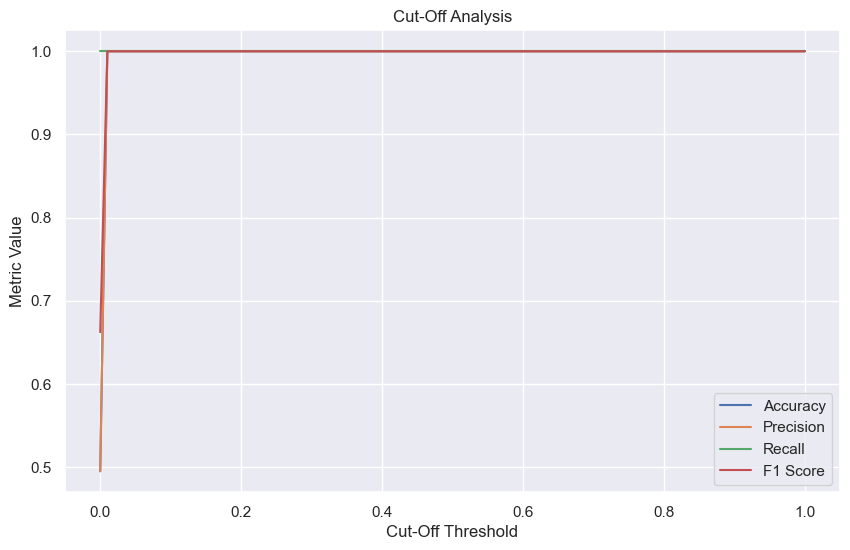

Optimal Cut-Off: 0.010101010101010102


In [86]:

# Split data into features (X) and target (y)
X = data_scaled.drop(columns=['target_Donor'])
y = df

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'], axis=1)
df_new = y_pred
data_scaled_new = pd.DataFrame(preprocessing.scale(new_data), columns=new_data.columns)
X_pred = data_scaled_new
y_new = df_new

# Now, let's perform the cut-off analysis
cut_offs = np.linspace(0, 1, 100)
metrics = []

for cut_off in cut_offs:
    predicted_labels = (y_test >= cut_off).astype(int)
    accuracy = np.mean(predicted_labels == y_test)
    precision = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(predicted_labels == 1)
    recall = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(y_test == 1)
    f1_score = 2 * precision * recall / (precision + recall)
    metrics.append([cut_off, accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Cut-Off', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Cut-Off'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Cut-Off'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Cut-Off'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Cut-Off'], metrics_df['F1 Score'], label='F1 Score')
plt.xlabel('Cut-Off Threshold')
plt.ylabel('Metric Value')
plt.title('Cut-Off Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal cut-off
optimal_cut_off = metrics_df.loc[metrics_df['F1 Score'].idxmax(), 'Cut-Off']
print("Optimal Cut-Off:", optimal_cut_off)


In [42]:
import csv

# Original data
data = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]

# Replace 1 with "Donor" and 0 with "No Donor"
data_replaced = ["Donor" if x == 1 else "No Donor" for x in data]

# Write to CSV file
with open('lda.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["value"])
    writer.writerow(data_replaced)


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Initialize Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49166666666666664


In [22]:
print("Predictions for future fundraising:")
print(new_pred)

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


In [23]:

pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDonor', 'PredNoDonor'],index=['Donor','NoDonor'])

,PredDonor,PredNoDonor
Donor,139,164
NoDonor,141,156


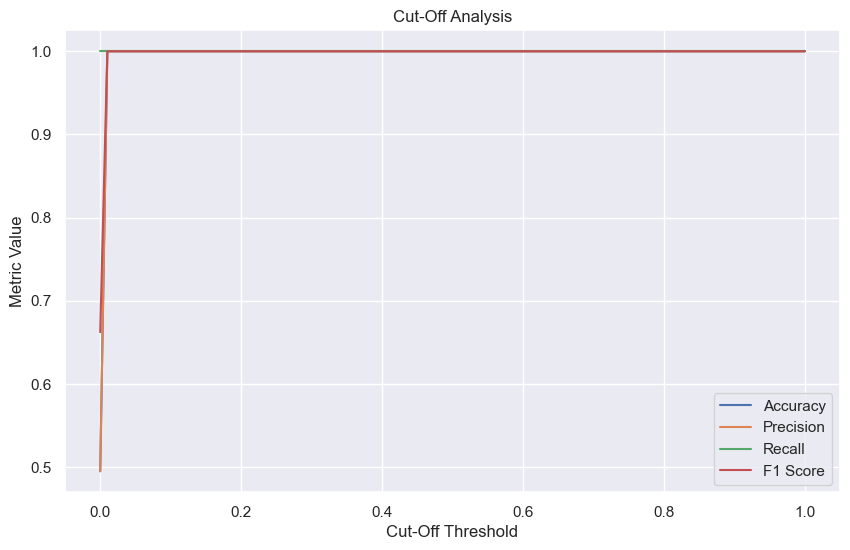

Optimal Cut-Off: 0.010101010101010102


In [79]:

# Split data into features (X) and target (y)
X = data_scaled.drop(columns=['target_Donor'])
y = df

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'], axis=1)
df_new = y_pred
data_scaled_new = pd.DataFrame(preprocessing.scale(new_data), columns=new_data.columns)
X_pred = data_scaled_new
y_new = df_new

# Now, let's perform the cut-off analysis
cut_offs = np.linspace(0, 1, 100)
metrics = []

for cut_off in cut_offs:
    predicted_labels = (y_test >= cut_off).astype(int)
    accuracy = np.mean(predicted_labels == y_test)
    precision = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(predicted_labels == 1)
    recall = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(y_test == 1)
    f1_score = 2 * precision * recall / (precision + recall)
    metrics.append([cut_off, accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Cut-Off', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Cut-Off'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Cut-Off'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Cut-Off'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Cut-Off'], metrics_df['F1 Score'], label='F1 Score')
plt.xlabel('Cut-Off Threshold')
plt.ylabel('Metric Value')
plt.title('Cut-Off Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal cut-off
optimal_cut_off = metrics_df.loc[metrics_df['F1 Score'].idxmax(), 'Cut-Off']
print("Optimal Cut-Off:", optimal_cut_off)


In [75]:
# QDA
clf         = QuadraticDiscriminantAnalysis()
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [76]:
print("Predictions for future fundraising:")
print(new_pred)

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


In [45]:
y_pred = clf.predict(X_test)
print("Predictions for future fundraising:")
print(new_pred)
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDonor', 'PredNoDonor'],index=['Donor','NoDonor'])

,PredDonor,PredNoDonor
Donor,2,301
NoDonor,1,296


In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49666666666666665


In [66]:
import csv

# Array of data
data = [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 1.]

# Write to CSV file
with open('predictionslda.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["prediction"])
    for value in data:
        writer.writerow([value])


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML

In [93]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from sklearn.decomposition import PCA

In [155]:
data.columns

Index(['num_child', 'income', 'wealth', 'home_value', 'med_fam_inc',
       'avg_fam_inc', 'pct_lt15k', 'num_prom', 'lifetime_gifts',
       'largest_gift', 'last_gift', 'months_since_donate', 'time_lag',
       'avg_gift', 'zipconvert2_Yes', 'zipconvert3_Yes', 'zipconvert4_Yes',
       'zipconvert5_Yes', 'homeowner_Yes', 'female_Yes', 'target_Donor'],
      dtype='object')

In [227]:
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)
#'income',    'wealth',  'home_value',  'med_fam_inc',  'avg_fam_inc',  'pct_lt15k' ,'avg_gift', 'zipconvert3_Yes' 
'num_child','largest_gift',  'last_gift', 'time_lag',  'avg_gift', 'zipconvert3_Yes',  'zipconvert4_Yes', 'female_Yes'
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

      num_child    income    wealth  home_value  med_fam_inc  avg_fam_inc  \
PC-1   0.112175  0.311126  0.234609    0.344672     0.452665     0.449582   
PC-2  -0.037192  0.051519 -0.002200   -0.046541    -0.047022    -0.029169   

      pct_lt15k  num_prom  lifetime_gifts  largest_gift  last_gift  \
PC-1  -0.391167 -0.183086       -0.192051      0.038583   0.064646   
PC-2   0.031457 -0.029941        0.254742      0.559263   0.550435   

      months_since_donate  time_lag  avg_gift  zipconvert2_Yes  \
PC-1             0.155932 -0.024052  0.089585        -0.139512   
PC-2             0.048109 -0.001979  0.522187         0.138899   

      zipconvert3_Yes  zipconvert4_Yes  zipconvert5_Yes  homeowner_Yes  \
PC-1        -0.032505         0.018142         0.121575       0.105074   
PC-2        -0.039517        -0.037932        -0.042469       0.083738   

      female_Yes  
PC-1   -0.032781  
PC-2    0.045712  


In [230]:
import pylab as pl
from sklearn.preprocessing import StandardScaler
# normalize data
from sklearn import preprocessing
df= data['target_Donor']

data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

np.random.seed(12345)
X = data_scaled.drop(columns=['target_Donor','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'])
y = df
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,last_gift,avg_gift,zipconvert3_Yes,zipconvert5_Yes,homeowner_Yes
1890,-0.200825,0.061617,0.630058,-0.107426,-0.813778,-0.724264,0.767258,0.144841,-0.179290,-0.474331,1.264774,0.545507
604,-0.200825,1.891839,0.630058,0.540692,0.429718,0.975215,-0.141261,-0.237074,0.098137,-0.474331,-0.790655,0.545507
1627,-0.200825,-0.548456,0.630058,1.668859,1.057223,1.099567,-0.223854,-0.714468,-0.546209,-0.474331,1.264774,0.545507
1894,-0.200825,-0.548456,0.630058,-0.825923,-1.193735,-1.505906,2.749481,0.622235,1.252590,-0.474331,-0.790655,-1.833157
473,8.488701,0.671691,0.630058,-0.097972,0.861487,1.099567,-1.049780,0.622235,0.581396,-0.474331,-0.790655,0.545507


In [286]:
# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'], axis=1)

In [249]:
df= data['target_Donor']

data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

np.random.seed(12345)
X = data_scaled.drop(columns=['target_Donor','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift'])
y = df
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,last_gift,avg_gift,zipconvert3_Yes,zipconvert5_Yes,homeowner_Yes
1890,-0.200825,0.061617,0.630058,-0.107426,-0.813778,-0.724264,0.767258,0.144841,-0.179290,-0.474331,1.264774,0.545507
604,-0.200825,1.891839,0.630058,0.540692,0.429718,0.975215,-0.141261,-0.237074,0.098137,-0.474331,-0.790655,0.545507
1627,-0.200825,-0.548456,0.630058,1.668859,1.057223,1.099567,-0.223854,-0.714468,-0.546209,-0.474331,1.264774,0.545507
1894,-0.200825,-0.548456,0.630058,-0.825923,-1.193735,-1.505906,2.749481,0.622235,1.252590,-0.474331,-0.790655,-1.833157
473,8.488701,0.671691,0.630058,-0.097972,0.861487,1.099567,-1.049780,0.622235,0.581396,-0.474331,-0.790655,0.545507


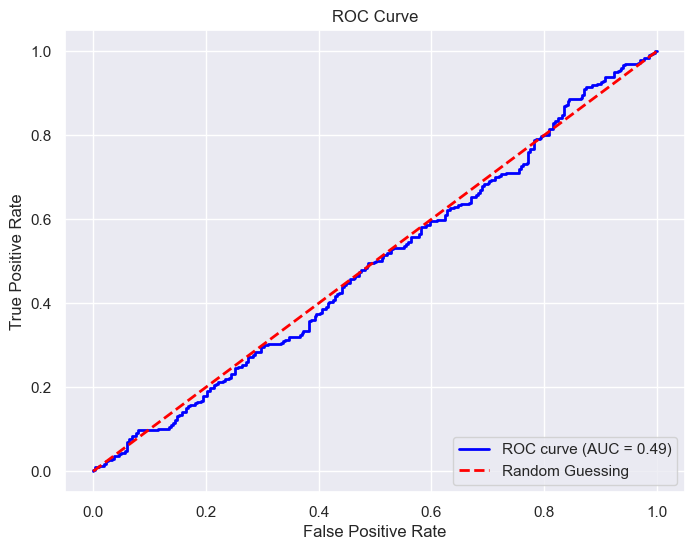

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt



# Predict probabilities for the positive class (class 1) on the test set
y_prob = clf.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


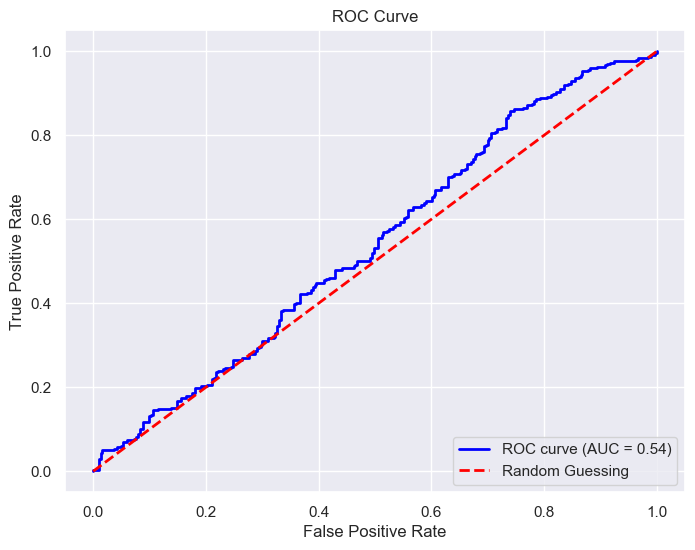

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt



# Predict probabilities for the positive class (class 1) on the test set
y_prob = clf2.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Accuracy: 0.52
              precision    recall  f1-score   support

         0.0       0.53      0.52      0.53       303
         1.0       0.52      0.54      0.53       297

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600



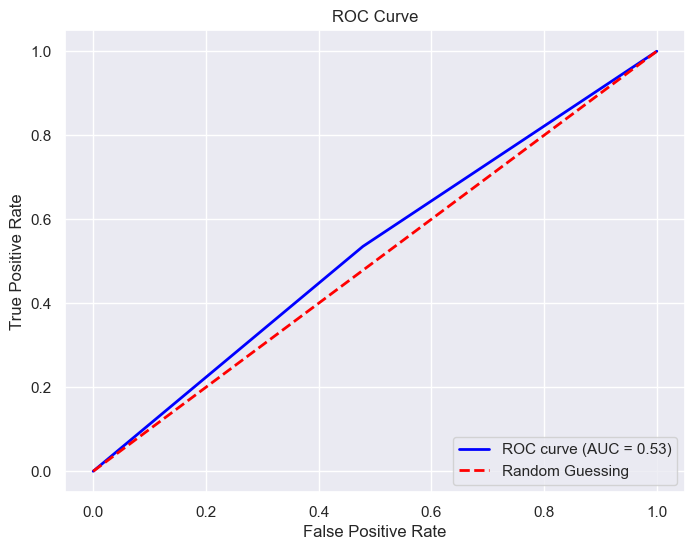

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=12345)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the labels for test set
y_prob = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print classification report for more detailed performance metrics
print(classification_report(y_test, y_prob))


# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [61]:
print("Predictions for future fundraising:")
print(new_pred)
pd.DataFrame(confusion_matrix(y_test, y_prob),columns=['PredDonor', 'PredNoDonor'],index=['Donor','NoDonor'])

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


,PredDonor,PredNoDonor
Donor,158,145
NoDonor,138,159


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Load the dataset
data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
data = pd.read_csv(data_url)

data = pd.get_dummies(data, dtype=np.float64).drop(['target_No Donor','zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'], axis=1)
data.head()
# Preprocess the data

df= data['target_Donor']
data_scaled = pd.DataFrame(preprocessing.scale(data), columns=data.columns)


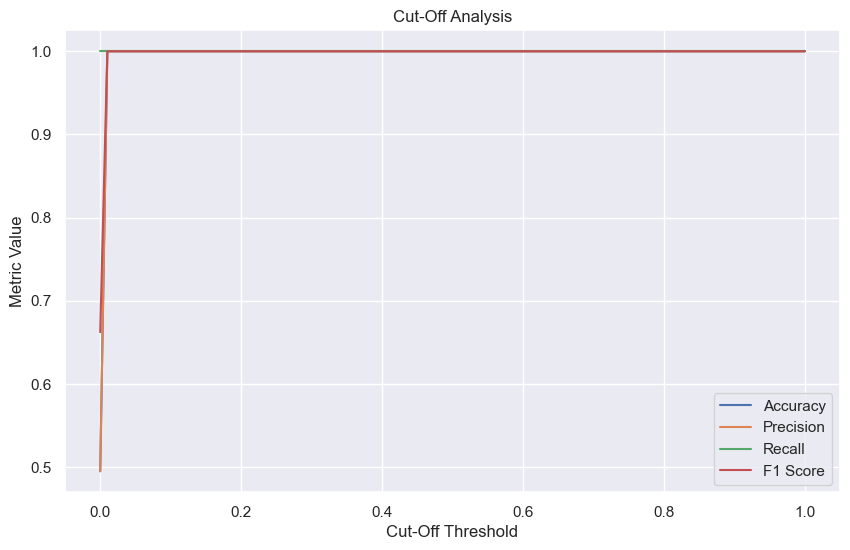

Optimal Cut-Off: 0.010101010101010102


In [77]:

# Split data into features (X) and target (y)
X = data_scaled.drop(columns=['target_Donor'])
y = df

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'], axis=1)
df_new = y_pred
data_scaled_new = pd.DataFrame(preprocessing.scale(new_data), columns=new_data.columns)
X_pred = data_scaled_new
y_new = df_new

# Now, let's perform the cut-off analysis
cut_offs = np.linspace(0, 1, 100)
metrics = []

for cut_off in cut_offs:
    predicted_labels = (y_test >= cut_off).astype(int)
    accuracy = np.mean(predicted_labels == y_test)
    precision = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(predicted_labels == 1)
    recall = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(y_test == 1)
    f1_score = 2 * precision * recall / (precision + recall)
    metrics.append([cut_off, accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Cut-Off', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Cut-Off'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Cut-Off'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Cut-Off'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Cut-Off'], metrics_df['F1 Score'], label='F1 Score')
plt.xlabel('Cut-Off Threshold')
plt.ylabel('Metric Value')
plt.title('Cut-Off Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal cut-off
optimal_cut_off = metrics_df.loc[metrics_df['F1 Score'].idxmax(), 'Cut-Off']
print("Optimal Cut-Off:", optimal_cut_off)
